In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [3]:
conn = sqlite3.connect("..//db.sqlite3")
query = """
SELECT 
    t1.id, t1.quantity, t2.datetime, t3.name, t3.price
FROM restaurant_orderitem AS t1
INNER JOIN restaurant_order AS t2 ON t1.order_id = t2.id
INNER JOIN restaurant_product AS t3 ON t1.product_id = t3.id
"""
df = pd.read_sql(query, conn)
df.to_csv("output.csv", index=False)
conn.close()
df.describe()
display(df)

,id,quantity,datetime,name,price
0,1,2,2019-08-03 20:25:00,Plain Papadum,0.80
1,2,1,2019-08-03 20:25:00,King Prawn Balti,12.95
2,3,1,2019-08-03 20:25:00,Garlic Naan,2.95
3,4,1,2019-08-03 20:25:00,Mushroom Rice,3.95
4,5,1,2019-08-03 20:25:00,Paneer Tikka Masala,8.95
...,...,...,...,...,...
74813,74814,2,2016-05-18 18:53:00,House Red wine 75cl,17.95
74814,74815,2,2016-05-14 19:28:00,House Red wine 75cl,17.95
74815,74816,2,2016-05-10 13:18:00,House Red wine 75cl,17.95
74816,74817,1,2016-04-07 19:04:00,House white wine 75cl,17.95


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

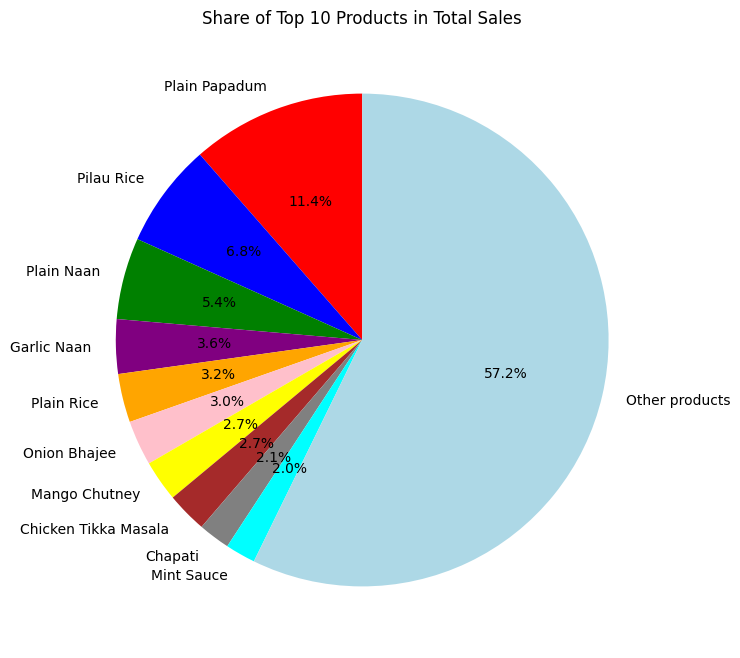

In [46]:
top_10_popular_products_sold = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(10)
total_products_sold = df["quantity"].sum()
other_products_sold = total_products_sold - top_10_popular_products_sold.sum()
sizes = list(top_10_popular_products_sold.values) + [other_products_sold]
labels = list(top_10_popular_products_sold.index) + ["Other products"]

colors = ["red", "blue", "green", "purple", "orange", "pink", "yellow", "brown", "gray", "cyan", "lightblue"]
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Share of Top 10 Products in Total Sales")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

In [ ]:
# write your code here

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

In [ ]:
# write your code here

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

In [ ]:
# write your code here